# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import matplotlib.patches as mpatches
plt.style.use('ggplot')
%matplotlib notebook
np.random.seed(15)

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    V = np.pi**(D/2)/sp.gamma(1+D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

1.
d = 2, V = 2*pi*R^2 = 3.14159, Function result: 3.14159
d = 3, V = 4/3*pi*R^3 = 4.18879, Function result: 4.18879
2.


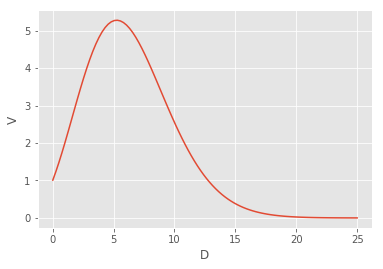

In [3]:
print('1.')
print('d = 2, V = 2*pi*R^2 = %g, Function result: %g' %(np.pi*1**2, getSphereVolumeExact(2)))
print('d = 3, V = 4/3*pi*R^3 = %g, Function result: %g' %(4/3*np.pi*1**3, getSphereVolumeExact(3)))
dScale = np.linspace(0.01, 25, 100)
V = []
for d in dScale:
    V.append(getSphereVolumeExact(d))
print('2.')
plt.xlabel('D')
plt.ylabel('V')
plt.plot(dScale, V)


### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [34]:
np.random.seed(14)
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    pointInside = 0
    for i in range(N):
        dot = np.random.rand(D)*R
        length = np.linalg.norm(dot)
        if length < R:
            pointInside+=1
    V = 2**D*R**D*pointInside/N
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

Text(0.5, 1.0, '$\\dfrac{(V_{exact} - V_{rand})}{V_{exact}}(D), N=10^4$')

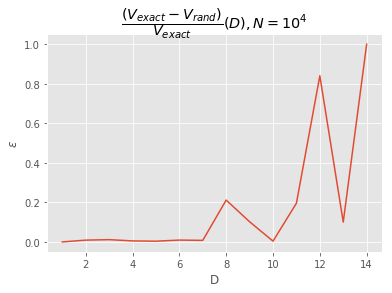

In [35]:
N = 10**4
eps = []
for d in range(1, 15):
    Vexact = getSphereVolumeExact(d)
    Vrand = getSphereVolumePseudorandom(N, d)
    eps.append((Vexact - Vrand)/Vexact)
plt.plot(np.arange(1, 15),np.abs(eps))
plt.xlabel('D')
plt.ylabel('$\epsilon$')
plt.title('$\dfrac{(V_{exact} - V_{rand})}{V_{exact}}(D), N=10^4$')

Ошибка выходит на единицу, значит, функция начинает выдавать 0. Это логично, так как размерность пространства увеличивается, а значит, количество точек внутри сферы будет уменьшаться. С увеличением количества точек момент значение D, соответствующее выходу на единицу должно увеличиваться. Проверим:

In [6]:
N = 10**5
epsNew = []
for d in range(1, 30):
    Vexact = getSphereVolumeExact(d)
    Vrand = getSphereVolumePseudorandom(N, d)
    epsNew.append((Vexact - Vrand)/Vexact)

Text(0.5, 1.0, '$\\dfrac{(V_{exact} - V_{rand})}{V_{exact}}(D), N=10^5$')

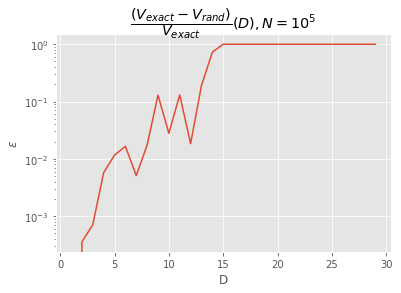

In [7]:
plt.plot(np.arange(1, 30),np.abs(epsNew))
plt.yscale('log')
plt.xlabel('D')
plt.ylabel('$\epsilon$')
plt.title('$\dfrac{(V_{exact} - V_{rand})}{V_{exact}}(D), N=10^5$')

Так и есть

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [8]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [28]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    pointInside = 0
    np.random.seed(15)
    dots = sobol_seq.i4_sobol_generate(D, N)*R
    for dot in dots:
        length = np.linalg.norm(dot)
        if length < R:
            pointInside+=1
    V = 2**D*R**D*pointInside/N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [37]:
N = 10**4 #Взяла поменьше, потому что компьютер не тянет больше точек
eps2 = []
for d in range(1, 15):
    Vexact = getSphereVolumeExact(d)
    Vrand = getSphereVolumeQuasirandom(N, d)
    eps2.append((Vexact - Vrand)/Vexact)

0.009037662332622853


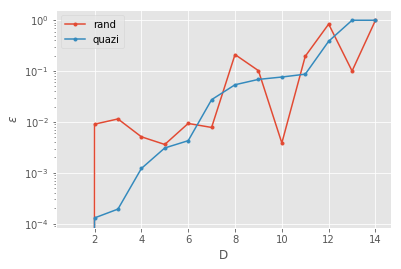

In [38]:
plt.yscale('log')
plt.plot(np.arange(1, 15),np.abs(eps),'.-',label='rand')
plt.plot(np.arange(1, 15),np.abs(eps2), '.-', label='quazi')
plt.xlabel('D')
plt.ylabel('$\epsilon$')
plt.legend()
print(eps[1])

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

В основном квазислучайная последовательность дает значительно меньшую ошибку и ведет себя более равномерно, является более точной.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [12]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.choice([-1,1], size=[N,N])
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [13]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = np.shape(state)[0]
    i1 = N-1 if i==0 else i-1
    j1 = N-1 if j==0 else j-1
    i2 = 0 if i==N-1 else i+1
    j2 = 0 if j==N-1 else j+1
    dE = 2*state[i,j]*(state[i1,j]+state[i2,j]+state[i,j1]+state[i,j2])
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [14]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = np.shape(state)[0]
    for _ in range(N*N):
        i, j = np.random.randint(N, size=2)
        dE = getDeltaE(i, j, state)
        if dE>0:      
            state[i, j] *= np.random.choice([-1, 1],p=[np.exp(-dE/T), 1-np.exp(-dE/T)])
        else:
            state[i, j] *=-1
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [15]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    N = np.shape(state)[0]
    for i in range(N):
        for j in range(N):
            E -= getDeltaE(i, j, state)/2 #Убиваем двойку из дельты и добавляем минус, чтобы получить энергию 2 ячейки
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [16]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [41]:
N       = 10#10         # размер решетки NxN
Nt      = 10#10         # количество точек температуры
eqSteps = 150#150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30#30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

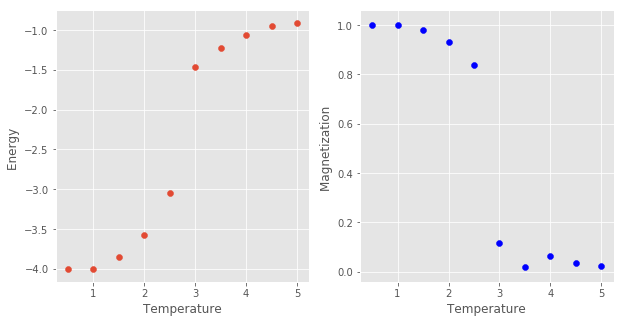

In [43]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Да, все хорошо. 
Качественно все в порядке -- наманиченность с ростом температуры падает, энергия, наоборот, растет.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [49]:
N = 64
state = getInitialState(N)

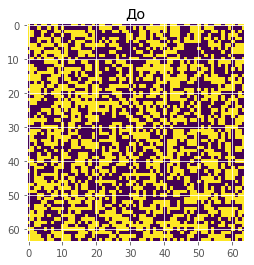

In [50]:
plt.figure()
# Write your code here
plt.title('До')
plt.imshow(state)

In [51]:
stateLow = state.copy()
tLow = 0.5
for _ in range(30):
    stateLow = makeFlip(tLow, stateLow)

Text(0.5, 1.0, 'После: низкая температура')

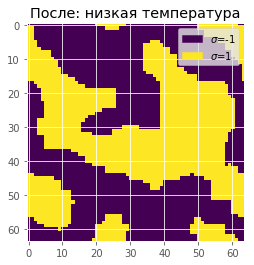

In [52]:
values = np.unique(stateLow.ravel())
im = plt.imshow(stateLow, interpolation='none')
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label="$\sigma$={l}".format(l=values[i]) ) for i in range(len(values)) ]
plt.legend(handles=patches)
plt.title('После: низкая температура')

In [53]:
stateHigh = state.copy()
tLow = 50
for _ in range(30):
    stateHigh = makeFlip(tLow, stateLow)

Text(0.5, 1.0, 'После: высокая температура')

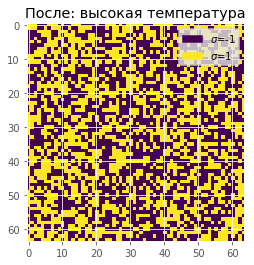

In [54]:
values = np.unique(stateHigh.ravel())
im = plt.imshow(stateHigh, interpolation='none')
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label="$\sigma$={l}".format(l=values[i]) ) for i in range(len(values)) ]
plt.legend(handles=patches)
plt.title('После: высокая температура')

Как мы видим, на низких температурах проявляются ферромагнитные св-ва: спины образуют кластеры, поворачиваясь в одну сторону. На высоких температурах этот эффект незаметен -- ферромагнитные свойства слабые. Это согласуется с графиком намагниченности.